<a href="https://colab.research.google.com/github/orsonmat/RETOS-TLG-ORSINI/blob/main/Explorando_Indice_de_Felicidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto - Visualización datos con Python

**Explorando el Indice de Felicidad**


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar la base de datos al dataframe "happiness"
happiness = pd.read_csv('/content/Happiness_report.csv')

# Extrar fragmento del dataframe solo con los datos de México
mexico = happiness[happiness['Country or region'] == 'Mexico']

# Asignar el columna "Country or region" en ambos dataframe como indice

mexico.set_index('Country or region', inplace=True)



**4. Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto**

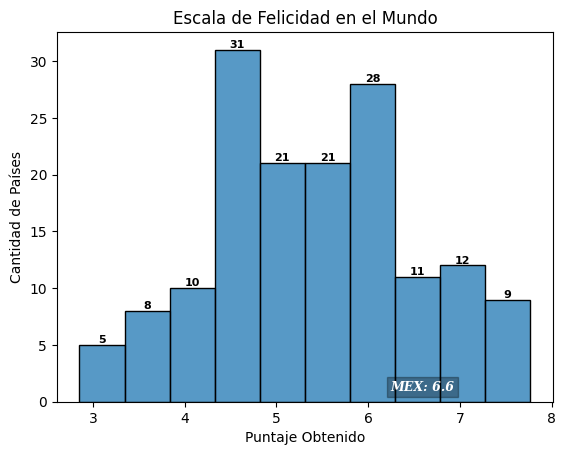

In [2]:
# Crear Historgrama a partir de seaborn

# Crear grafico y asignar titulos
graph1 = sns.histplot(x='Score',data=happiness, bins = 10 )
plt.title('Escala de Felicidad en el Mundo')
plt.xlabel('Puntaje Obtenido')
plt.ylabel('Cantidad de Países')

#obtener el valor del score de mexico para cordenada x
score_mex= mexico['Score'].values[0]

#Asignar tipo de texto para la anotación
typetex = {'family': 'serif', 'size': 9, 'weight': 'bold', 'style': 'italic', 'color': 'white', 'horizontalalignment': 'center'}
#Agregar la anotacion al grafico con un tipo de caja circular
plt.text(score_mex,1,"MEX: " + str(round(score_mex,2)),fontdict=typetex, bbox=dict(boxstyle='square',facecolor='black',alpha=0.3,pad=0.3))

#Agregar valor en cada barra del histograma
for patch in graph1.patches:
    bin_height = patch.get_height()
    bin_x = patch.get_x() + patch.get_width() / 2
    plt.text(bin_x, bin_height, int(bin_height), fontsize = 8, weight= 'bold', ha='center', va='bottom')
plt.show()

**5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación**

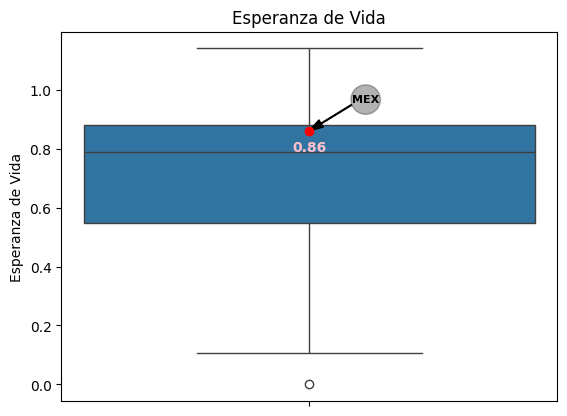

In [3]:
# Crear grafico boxplot a partir de la expectativa de vida
sns.boxplot(y='Healthy life expectancy', data=happiness)
plt.title('Esperanza de Vida')
plt.ylabel('Esperanza de Vida')

#obtener el valor del score de mexico para cordenada y
life_mex= mexico['Healthy life expectancy'].values[0]

plt.scatter(0, life_mex, color='red', zorder=5)  # Marcar el punto donde esta Mexico, zorder=5 para asegurarse de que el punto esté encima del boxplot
plt.text(0, life_mex-0.07, round(life_mex,2), color='pink', weight='bold', ha='center') # Incluir valor de Mexico
plt.annotate('MEX',xy=(0,life_mex),xytext=(0.1,0.95),
             arrowprops=dict(width = 0.5, headwidth = 6, headlength = 10, color="black"),
             bbox=dict(boxstyle='circle',facecolor='black',alpha=0.3,pad=0.1),
             fontsize = 8 , weight= 'bold', ha='center', va='bottom') # Agregar anotacion de flecha y texto dentro de circulo al grafico
plt.show()



**6. Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.**

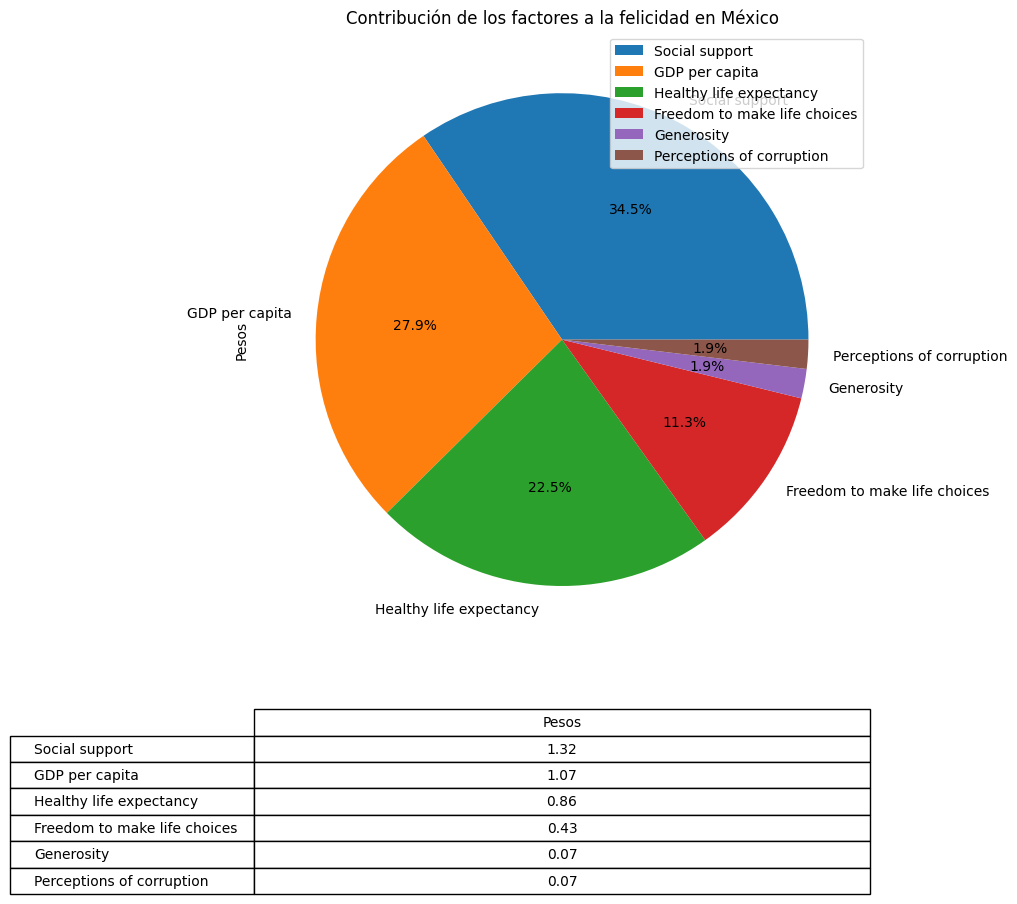

In [4]:
kpis_mex = mexico.drop(['Score','Overall rank'],axis=1)
kpis_mex = kpis_mex.T
kpis_mex.rename(columns={'Mexico': 'Pesos'}, inplace=True)
Kpis_mex = kpis_mex.sort_values(by='Pesos', ascending=False,inplace=True)
kpis_mex.index.name = 'KPI'

# Crear grafico circular a partir de los kpis de mexico

kpis_mex.plot.pie(y='Pesos', labels = kpis_mex.index, figsize=(8,8),autopct='%1.1f%%') # Crear Pastel
plt.title('Contribución de los factores a la felicidad en México') # Intertar título
plt.table(cellText= np.round(kpis_mex.values,2),colLabels= kpis_mex.columns, rowLabels=kpis_mex.index, cellLoc='center', loc='center', bbox=[0, -0.4, 1, 0.3]) #Insetar Tabla de datos
plt.show()

**7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores**

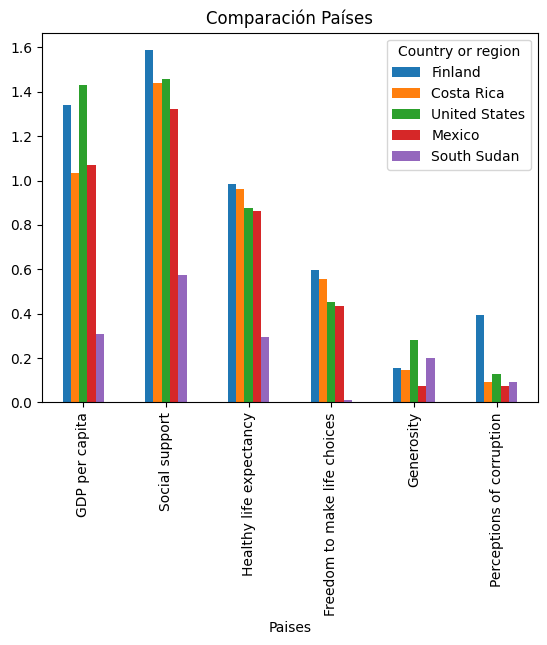

In [5]:
pais_mas_feliz = happiness.loc[happiness['Score'].idxmax(),'Country or region'] # Pais mas Feliz
pais_menos_feliz = happiness.loc[happiness['Score'].idxmin(),'Country or region'] # Pais menos Feliz
otros_paises = ['Mexico','Costa Rica', 'United States']  # Añadir otros dos países de interés

# Filtrar el DataFrame para quedarte con los países seleccionados
paises_seleccionados = [pais_mas_feliz, pais_menos_feliz, *otros_paises]
paises = happiness[happiness['Country or region'].isin(paises_seleccionados)]
paises = paises.drop(['Overall rank','Score'],axis=1)
paises.set_index('Country or region', inplace=True)
paises = paises.T

paises.plot.bar()
plt.title('Comparación Países')
plt.xlabel('Paises')
plt.show()

**8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.**

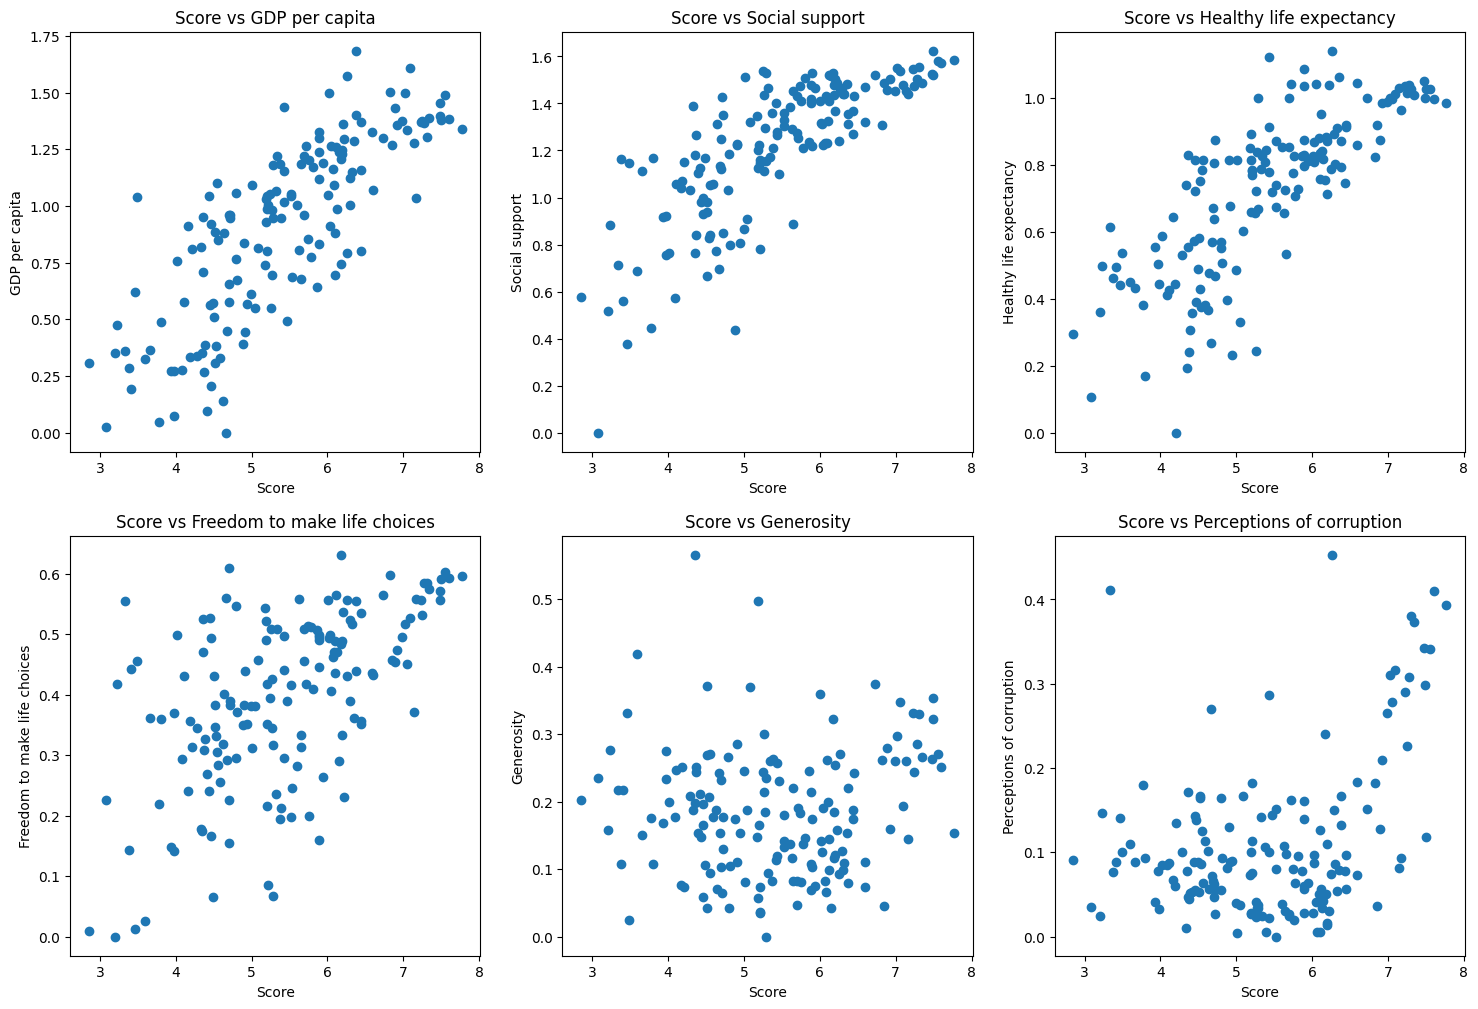

In [6]:
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Crear la figura y la matriz de subgráficas 2x3
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Iterar sobre los factores y crear un scatter plot en cada subgráfica
for i, factor in enumerate(factores):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(happiness['Score'],happiness[factor])
    axs[row, col].set_title(f'Score vs {factor}')
    axs[row, col].set_ylabel(factor)
    axs[row, col].set_xlabel('Score')

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

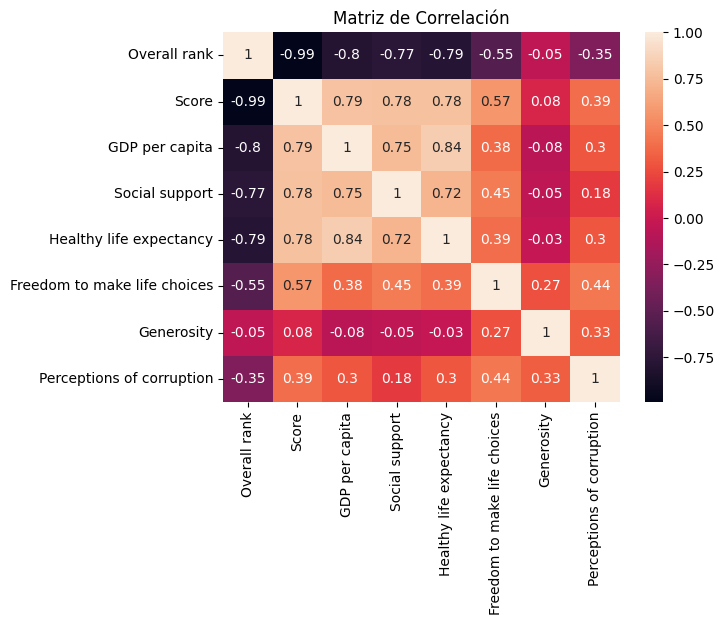

In [14]:
happiness2=happiness.set_index('Country or region')
happiness2.head()
sns.heatmap(round(happiness2.corr(),2), annot=True)
plt.title('Matriz de Correlación')
plt.show()

9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [30]:
# Cargar la informacion de metadatos en otro Dataframe
region = pd.read_csv('/content/Metadata.csv')

#Utilizar la función Merge para agregar los campos nuevos al dataframe original
happinessbyregion = pd.merge(happiness, region, left_on='Country or region', right_on= 'TableName', how = 'left')
print(happinessbyregion.info())
# Se han detectado 20 filas sin coincidencias entre ambas dataframes
# Se revisaran estos registros
no_region= happinessbyregion.loc[happinessbyregion['TableName'].isnull()]
print(no_region)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Country Code                  136 non-null    object 
 10  Region                        136 non-null    object 
 11  IncomeGroup                   136 non-null    object 
 12  SpecialNotes                  46 non-null     object 
 13  Table

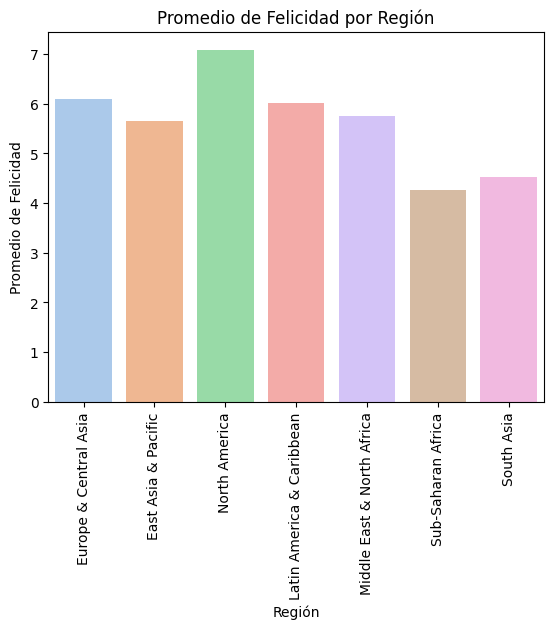

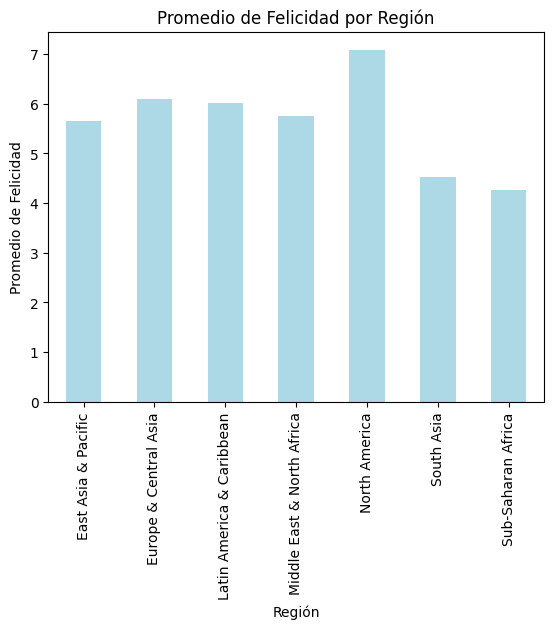

In [63]:
# Se excluiran los registros donde no hay match cambiando el orden de la función merge por Inner
happinessbyregion_match = pd.merge(happiness, region, left_on='Country or region', right_on= 'TableName', how = 'inner')

# Aplicar resumen de agrupación del puntaje (Score) por región usando parametros hue y estimator de seaborn
sns.barplot(x='Region', y='Score', data=happinessbyregion_match, estimator=np.mean, hue='Region', legend=False, palette = 'pastel', errorbar=None)
plt.title('Promedio de Felicidad por Región')
plt.xlabel('Región')
plt.ylabel('Promedio de Felicidad')
plt.xticks(rotation=90)
plt.show()

#Otra forma de graficar usando groupby y pandas
region_mean_happiness = happinessbyregion_match[['Region','Score']].groupby('Region').mean().reset_index()

region_mean_happiness.plot.bar(x='Region', y='Score', rot=90, color ='lightblue', legend=False)
plt.title('Promedio de Felicidad por Región')
plt.xlabel('Región')
plt.ylabel('Promedio de Felicidad')
plt.show()


